EXPLORATORY DATA ANALYSIS

In [3]:
#Importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

players = pd.read_csv("C:\\Users\\siddh\\OneDrive\\Desktop\\Temporary Files\\FootballPrediction\\players_20.csv") #change to your directory

In [4]:
# Assigning single position to each player

players['main_position'] = players['player_positions'].str.split(pat = ',', n = -1, expand = True)[0]
selected_columns = ['short_name', 'club', 'main_position', 'overall']
players = players.drop('player_positions', axis = 1)
print(players[selected_columns].head(5))

          short_name                 club main_position  overall
0           L. Messi         FC Barcelona            RW       94
1  Cristiano Ronaldo             Juventus            ST       93
2          Neymar Jr  Paris Saint-Germain            LW       92
3           J. Oblak      Atlético Madrid            GK       91
4          E. Hazard          Real Madrid            LW       91


<function matplotlib.pyplot.show(close=None, block=None)>

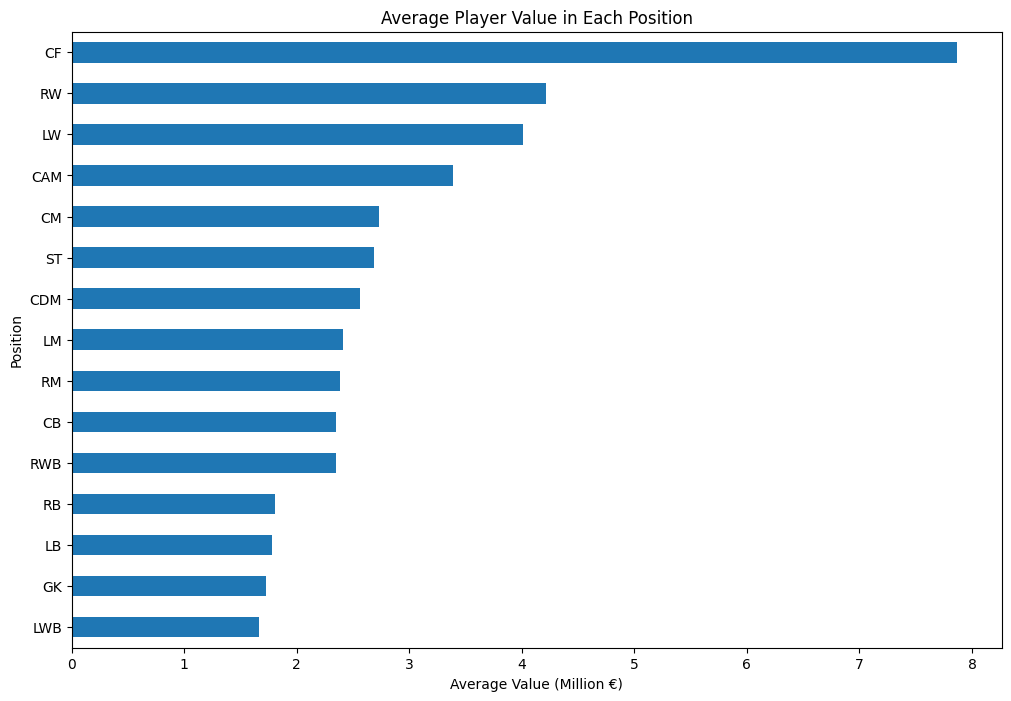

In [5]:
# To identify the most valuable position

players_grouped = players.groupby('main_position')['value_eur'].mean()/1e6
players_grouped = players_grouped.sort_values()
players_grouped.plot(kind = 'barh', figsize = (12, 8))
plt.title("Average Player Value in Each Position")
plt.xlabel("Average Value (Million €)")
plt.ylabel("Position")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

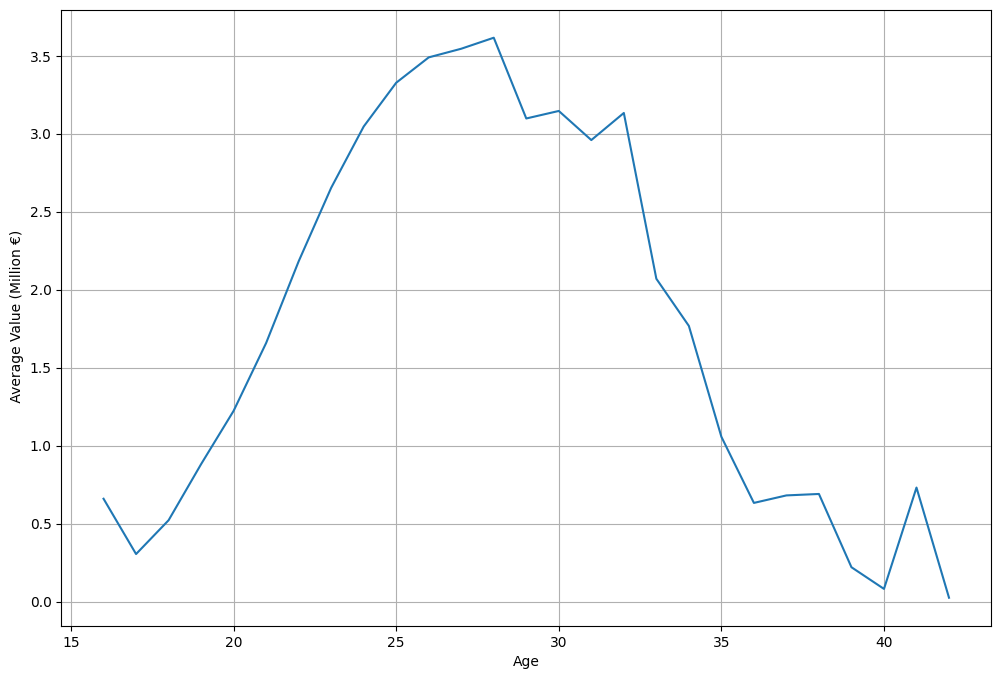

In [6]:
# Age Dependence

players_grouped_age = players.groupby('age')['value_eur'].mean()/1e6
players_grouped_age.plot(grid = True, figsize = (12, 8))
plt.ylabel(' Average Value (Million €)')
plt.xlabel('Age')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

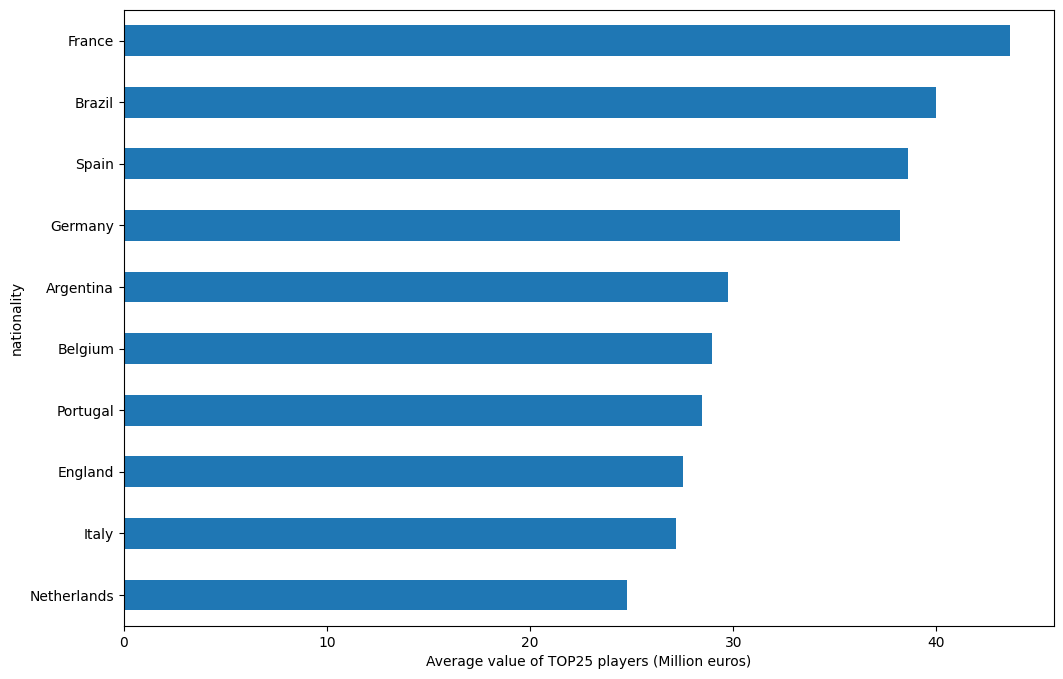

In [7]:
# Top 10 most expensive national teams (grouped by mean of top 25 players)

players_country = players.groupby('nationality')['value_eur'].nlargest(25).reset_index(level = 1, drop = True)
players_country = players_country.groupby('nationality').mean()/1e6
players_country_top10=(players_country.sort_values()).tail(10)
players_country_top10.plot(kind='barh',figsize=(12,8))
plt.xlabel("Average value of TOP25 players (Million euros)")
plt.show

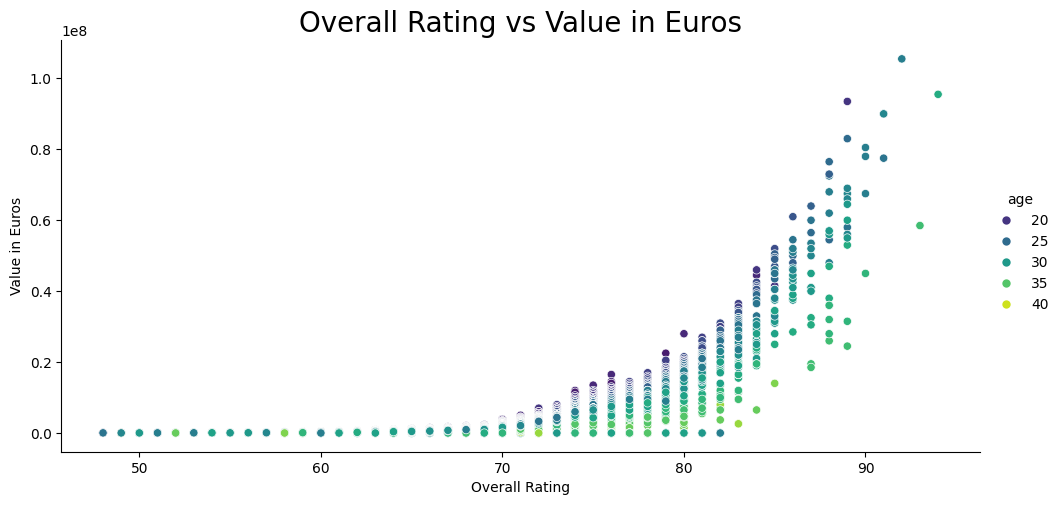

In [9]:
# Overall Rating VS Value in Euros

import seaborn as sns
sns.relplot(x='overall',y='value_eur',hue='age',palette = 'viridis', sizes=(15, 200),aspect=2,data=players)
plt.title('Overall Rating vs Value in Euros',fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

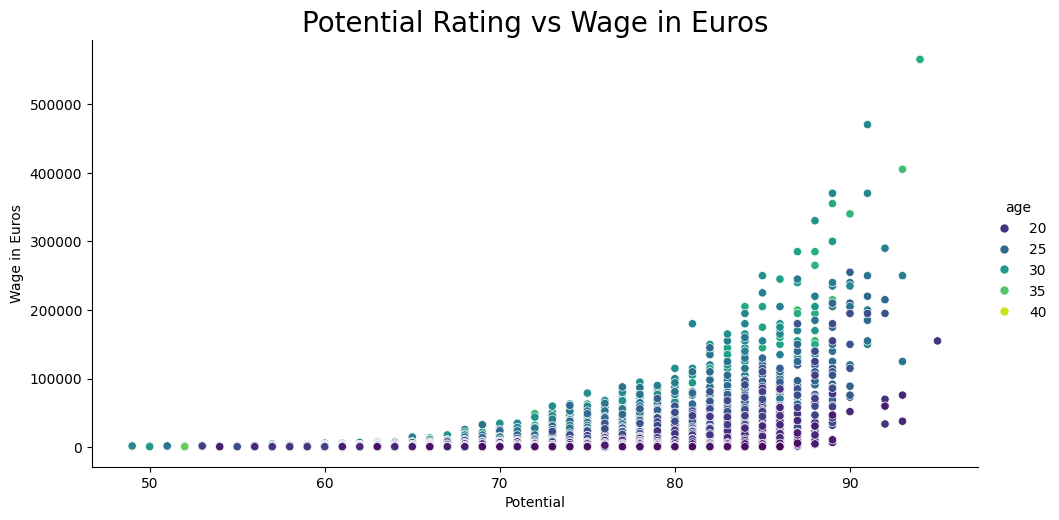

In [11]:
# Potential Rating VS Wage in Euros

sns.relplot(x='potential',y='wage_eur',hue='age',palette = 'viridis', sizes=(15, 200),aspect=2,data=players)
plt.title('Potential Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Wage in Euros')
plt.show()